# Baby names in Belgium in 1995-2016

How the Belgian baby names changed throughout 22 years before 2016? Which names were the most popular ones?

In this notebook, we will use SQL to analyze trends in baby names popularity in Belgium in 1995-2016.

The data set was obtained here: https://data.world/szn/baby-names-in-belgium-1995-2016
More information about the data can be found here:
https://statbel.fgov.be/nl/themas/bevolking/namen-en-voornamen/voornamen-van-meisjes-en-jongens#news

Note: the original dataset did not contain any names with a frequency less than 5 per year.

In [1]:
# Necessary import
import pandas as pd

#Read the xlsx file
baby_names = pd.read_excel('names.xlsx', index_col=0)

In [2]:
# Necessary import
from pandasql import sqldf

# Define a function that runs sql query
mysql = lambda q: sqldf(q, globals())

Let's take a look at the data!

In [3]:
# Select all columns of the table
query = """
SELECT *
FROM baby_names
"""

# Run mysql function
mysql(query)

,Region,Year,Gender,Name,Count
0,Total Belgium,1995,Girls,Laura,1484
1,Total Belgium,1995,Girls,Sarah,914
2,Total Belgium,1995,Girls,Julie,865
3,Total Belgium,1995,Girls,Charlotte,773
4,Total Belgium,1995,Girls,Marie,726
...,...,...,...,...,...
64202,Total Belgium,2016,Boys,Yousef,5
64203,Total Belgium,2016,Boys,Yuri,5
64204,Total Belgium,2016,Boys,Yuvraj,5
64205,Total Belgium,2016,Boys,Zias,5


We can see that the column contains five columns:\
    
**Region** indicating the region in Belgium;\
**Year** column;\
**Gender** column indicating genders of babies recieving a corresponding name;\
**Name** column with all the first names given to babies;\
**Count** column wich contains the total number of times a certain name was given to babies in a particular year.
    

## How many different baby names were used in Belgium in 1995-2016?

Let's inspect how many different names babies in Belgium received in years 1995-2016.

In [4]:
# Define SQL query to obtain different baby names and and the total number of times they were used
query="""
SELECT
    Name,
    SUM(Count)
FROM baby_names
GROUP BY Name
ORDER BY SUM(Count) DESC
"""
# Run the query
mysql(query)

,Name,SUM(Count)
0,Thomas,14935
1,Laura,14660
2,Emma,13445
3,Marie,12668
4,Lucas,12217
...,...,...
6629,Abir,5
6630,Abdulah,5
6631,Abdeljalil,5
6632,Abdelhafid,5


We can see that there were 6634 different names given to babies in Belgium in year 1995-2016.

## How  many baby names were used during all 22 years of survey?

How many of the 6634 names given to babies in Belgium in 1995-2016 stood the test of time and were popular during all 22 years covered by the survey?
Let's answer this question!

In [5]:
# Define SQL query to obtain baby names and and the total number of times they were used for names that remained popular 
#throughout 22 years
query="""
SELECT
    Name,
    SUM(Count)
FROM baby_names
GROUP BY Name
HAVING COUNT(Year)=22
ORDER BY SUM(Count) DESC
"""

# Run the query
mysql(query)

,Name,SUM(Count)
0,Thomas,14935
1,Laura,14660
2,Emma,13445
3,Marie,12668
4,Lucas,12217
...,...,...
924,Jim,216
925,Pedro,204
926,Aurélia,162
927,Hortense,161


We can see that, out of 6634 names given to babies in Belgium in 1995-2016, only 929 baby names were popular during all 22 years covered by the survey. 

It turns out that the boy name Thomas and the girl name Laura were the most popular ones within the baby names that were used throughout the 22 years covered by the survey.

## Standard and trendy baby names in Belgium 

Now, let's deepen our understanding of the data by looking at all names. 
We can capture the type of popularity that each baby name used in Belgium in 1995-2016 had. 
Was the name standard and popular during many years or trendy, only popular for a few years? Let's find out.

In [6]:
# Define SQL query ton obtain names, the total number of babies given the name, the number of years the name was popular 
# and the type of popularity of the name: standard, semi-standard, semi-trendy and trendy
query="""
SELECT
  Name,
  SUM(Count) AS total_count,
  Count(Name) AS years_popular,
  CASE WHEN COUNT(Name)>16 THEN 'Standard'
       WHEN COUNT(Name)>10 THEN 'Semi-standard'
        WHEN COUNT(Name)>5 THEN 'Semi-trendy'
        WHEN COUNT(Name)>0 THEN 'Trendy' END AS popularity_type
FROM baby_names
GROUP by Name
ORDER BY Name
"""

# Run the query
mysql(query)

,Name,total_count,years_popular,popularity_type
0,Aagje,173,18,Standard
1,Aaliyah,329,16,Semi-standard
2,Aalyah,6,1,Trendy
3,Aaricia,48,9,Semi-trendy
4,Aaron,3742,22,Standard
...,...,...,...,...
6629,Émilie,29,3,Trendy
6630,Ömer,494,22,Standard
6631,Özge,70,11,Semi-standard
6632,Özlem,71,10,Semi-trendy


We can see that, for instance, names like Aaron,Omer and Aagje can be classified as standard as they remained popular during
many years,whereas names like Aalyah, Emilie, Umit were trendy during a couple of years.

## 10 most popular boy names in Belgium

Which boy names were the top-ranked names in Belgium in the 22 years covered by the survey?
Let's find out!

In [7]:
# Define SQL query to find 10 most popular boy names 
query="""
SELECT
    Name,
    SUM(Count) AS total_count,
    ROW_NUMBER() OVER(ORDER BY SUM(Count) DESC) AS name_rank 
FROM baby_names
WHERE Gender='Boys'
GROUP BY Name
LIMIT 10;
"""

# Run the query
mysql(query)

,Name,total_count,name_rank
0,Thomas,14935,1
1,Lucas,12217,2
2,Louis,11644,3
3,Nathan,10987,4
4,Maxime,10155,5
5,Noah,10098,6
6,Arthur,9980,7
7,Nicolas,9030,8
8,Simon,8750,9
9,Mohamed,8445,10


We can see that Thomas was the most popular boy name in Belgium in years 1995-2016.

## 10 most popular girl names in Belgium

Now, let's find out the top-ranked girl names in years 1995-2016 in Belgium.

In [8]:
# # Define SQL query to find 10 most popular girls names 
query="""
SELECT
    Name,
    SUM(Count) AS total_count,
    ROW_NUMBER() OVER(ORDER BY SUM(Count) DESC) AS name_rank 
FROM baby_names
WHERE Gender='Girls'
GROUP BY Name
LIMIT 10;
"""

# Run the query
mysql(query)

,Name,total_count,name_rank
0,Laura,14660,1
1,Emma,13445,2
2,Marie,12668,3
3,Sarah,11285,4
4,Julie,11098,5
5,Louise,10247,6
6,Charlotte,9730,7
7,Manon,9693,8
8,Lisa,8597,9
9,Camille,8512,10


As we can se, Laura was the most popular girl name in Belgium in years  1995-2016.

## Evolution of Thomas and Laura

Let's see how the popularity of the top boy and girl names in Belgium evolved during 22 years.

In [9]:
# Define SQL query to estimate Thomas popularity over time
query="""
SELECT
    Year,
    Name,
    Count,
   SUM(Count) OVER(ORDER BY Year ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS cumulative_thomas
FROM baby_names
WHERE Name='Thomas'
ORDER BY Year 
"""
# Run the query
mysql(query)

,Year,Name,Count,cumulative_thomas
0,1995,Thomas,1046,1046
1,1996,Thomas,1132,2178
2,1997,Thomas,1157,3335
3,1998,Thomas,1044,4379
4,1999,Thomas,966,5345
5,2000,Thomas,1041,6386
6,2001,Thomas,997,7383
7,2002,Thomas,907,8290
8,2003,Thomas,720,9010
9,2004,Thomas,708,9718


In [10]:
# Impot necessary for data visualization
import matplotlib.pyplot as plt

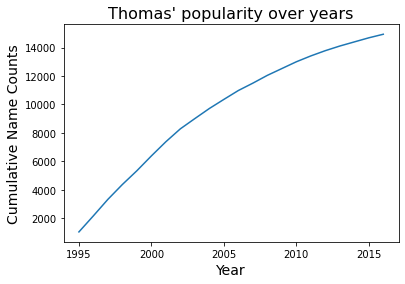

In [11]:
# Plot Thomas cumulative popularity over time
plt.plot(mysql(query).Year,mysql(query).cumulative_thomas)
plt.title("Thomas' popularity over years",fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Cumulative Name Counts',fontsize=14)
plt.show()

We can see that the popularity of Thomas or the cumulative count growth does not have a linear trend but rather negative exponential trend.
    
Thus, we can see that the popularity growth of this name slowed down in the last years covered by the survey as compared to the first years.  

In [12]:
# Define SQL query to estimate Laura popularity over time

query="""
SELECT
    Year,
    Name,
    Count,
   SUM(Count) OVER(ORDER BY Year ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS cumulative_thomas
FROM baby_names
WHERE Name='Laura'
ORDER BY Year 
"""

# Run the query
mysql(query)

,Year,Name,Count,cumulative_thomas
0,1995,Laura,1484,1484
1,1996,Laura,1439,2923
2,1997,Laura,1243,4166
3,1998,Laura,1192,5358
4,1999,Laura,1100,6458
5,2000,Laura,1020,7478
6,2001,Laura,951,8429
7,2002,Laura,749,9178
8,2003,Laura,698,9876
9,2004,Laura,602,10478


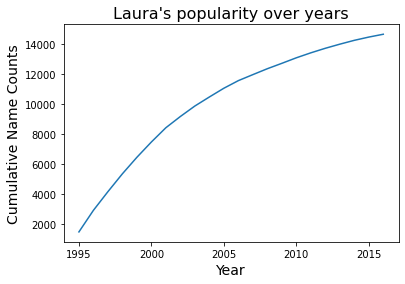

In [13]:
# Plot Laura's cumulative popularity over time
plt.plot(mysql(query).Year,mysql(query).cumulative_thomas)
plt.title("Laura's popularity over years",fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Cumulative Name Counts',fontsize=14)
plt.show()

We can see that the popularity growth of the name Laura has the same shape as in the case of the most popular boy name-Thomas.

## Most popular boys and girls names over the years

Remember that  we previously found out which names were standars and had been given to babies during many years in Belgium.
Hovewer, showing up in the dataset during many years doesn't necessarily mean that the standard names were the most popular. Let's explore popular names a little further!

First, we will list every year along with the most popular boy name in that year.

In [14]:
# Define a SQL query to  list every year along with the most popular boy name in that year and the number of times
# the name was given to babies that year
query="""
SELECT 
    b.Year,
    b.Name,
    b.Count 
FROM baby_names AS b 
INNER JOIN 
(SELECT
    Year,
    max(Count) AS max_counts  
FROM baby_names 
WHERE Gender='Boys'
GROUP BY Year) AS m
ON b.Count=m.max_counts AND b.Year=m.Year
ORDER BY b.Year DESC
"""
# Run the query
mysql(query)

,Year,Name,Count
0,2016,Lucas,629
1,2015,Louis,613
2,2014,Louis,622
3,2013,Louis,615
4,2012,Lucas,652
5,2011,Lucas,677
6,2010,Lucas,674
7,2009,Noah,713
8,2008,Noah,763
9,2007,Nathan,693


We can see that names like  Louis, Lucas ,Noah, Nathan and Thomas were the most popular boys names in different years from 1995 to 2016
Belgium.

Thomas was the most popular name over nine years before 2004!

Now, let's list every year along with the most popular girl name in that year.

In [15]:
# Define a SQL query to  list every year along with the most popular girl name in that year and the number of times
# the name was given to babies that year
query="""
SELECT 
    b.Year,
    b.Name,
    b.Count 
FROM baby_names AS b 
INNER JOIN 
(SELECT
    Year,
    max(Count) AS max_counts  
FROM baby_names 
WHERE Gender='Girls'
GROUP BY Year) AS m
ON b.Count=m.max_counts AND b.Year=m.Year
ORDER BY b.Year DESC
"""
# Run the query
mysql(query)

,Year,Name,Count
0,2016,Emma,662
1,2015,Emma,645
2,2014,Emma,653
3,2013,Emma,633
4,2012,Emma,629
5,2011,Emma,709
6,2010,Emma,709
7,2009,Emma,704
8,2008,Emma,736
9,2007,Emma,676


The situtation for the girls names was more stable than that of the boys names- only two girls names were the most popular
ones in different years in 1995-2016. Those names are Laura and Emma.
The name Laura was the most popular baby girls name during eight years before 2003, and starting from 2003 and till 2016 Emma
was the most popular girl name.

## Which baby name was the most pupolar the most number of  years?

We have found out that the boy name Thomas and the girl names Emma and Laura were the most popular baby names during many years in Belgium.
However, we do not know yet which name has been number one for the largest number of years. Let's find out!

To answer this question, we will first list years together with the corresponding most common baby names in each year and the
correspoinding number of times the baby name was used in each year. And then, we will rank the names according to the
number of years they were the most popular baby names in Belgium.


### Most common name every year among all the babies

In [16]:
# Define a SQL query list years together with the corresponding most common baby names in each year 
#and the correspoinding number of times the baby name was used in each year
query="""
SELECT 
    b.Year,
    b.Name,
    b.Count 
FROM baby_names AS b 
INNER JOIN 
(SELECT
    Year,
    max(Count) AS max_counts  
FROM baby_names 
GROUP BY Year) AS m
ON b.Count=m.max_counts AND b.Year=m.Year
ORDER BY b.Year DESC
"""
# Run the query
mysql(query)

,Year,Name,Count
0,2016,Emma,662
1,2015,Emma,645
2,2014,Emma,653
3,2013,Emma,633
4,2012,Lucas,652
5,2011,Emma,709
6,2010,Emma,709
7,2009,Noah,713
8,2008,Noah,763
9,2007,Nathan,693


### Baby names and years of their top popularity

In [17]:
# Define a SQL query to rank the names according to the number of years they were the most popular baby names
query="""
WITH top_names AS (
SELECT 
    b.Year,
    b.Name,
    b.Count 
FROM baby_names AS b 
INNER JOIN 
(SELECT
    Year,
    max(Count) AS max_counts  
FROM baby_names 
GROUP BY Year) AS m
ON b.Count=m.max_counts AND b.Year=m.Year
ORDER BY b.Year DESC)
SELECT 
 Name,
 COUNT(Name)  AS count_top_name
FROM top_names
GROUP BY Name
ORDER BY count_top_name DESC
"""
# Run the query
mysql(query)

,Name,count_top_name
0,Emma,8
1,Laura,5
2,Noah,4
3,Thomas,3
4,Nathan,1
5,Lucas,1


So if we consider all baby names, including both girl and boy names, the name Emma was the most popular baby name for most
number of years - eight. 

The most popular girl name starting with a K in belgium in 1995-2016 was Kato

**All in all, we have analyzed the trends in names given to babies in Belgium in a span of 22 years: from 1995 to 2016 (both inclusive).**